### Problem: Can we estimate the price of a used car based on it's characteristics?
#### Usecase
Tom wants to sell his car. He wants to earn as much money from selling the car and a reasonable amount for his buyers that someone actually wants to purchase it. So, the price he set should represent the value of the car. How can we help Tom to determine the best price for his car?

We will use various python packages to perform Data Cleaning, Exploratory Data Analysis, model development and model evaluation. Let's start by looking at the used car prices data.
ref: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/
        
We are using the clean dataset after Data Cleaning and Wrangling from previous two projects

#### Goal: Predict the price of the car based on other car features (predictors)

## Project Goal: The goal of this file is to start exploratory data analysis process covering groupby, analysis of variance (ANOVA) and Correlation. 

### The question to answer is "What are the main characteristics that have the most impact on the used car price?"

## 1. Importing libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 2. Loading Data

In [20]:
df= pd.read_csv("automobiles.csv")
df

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,highway-mpg,price,horsepower-binned,price-binned,city-L/100km,highway-L/100km,diesel,gas,std,turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,27,13495,Low,Low,11.190476,8.703704,0,1,1,0
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,27,16500,Low,Low,11.190476,8.703704,0,1,1,0
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,26,16500,Medium,Low,12.368421,9.038462,0,1,1,0
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,30,13950,Low,Low,9.791667,7.833333,0,1,1,0
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,22,17450,Low,Low,13.055556,10.681818,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,28,16845,Low,Low,10.217391,8.392857,0,1,1,0
197,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.955556,...,25,19045,Medium,Medium,12.368421,9.400000,0,1,0,1
198,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,23,21485,Medium,Medium,13.055556,10.217391,0,1,1,0
199,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,27,22470,Low,Medium,9.038462,8.703704,1,0,0,1


##  3. Descriptive Statistics

In [21]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel,gas,std,turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330711,3.256904,...,5117.587940,25.179104,30.686567,13207.129353,9.944145,8.044957,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,478.113178,6.423220,6.815150,7947.066342,2.534599,1.840739,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,5117.587940,24.000000,30.000000,10295.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000


In [22]:
drive_wheels_counts = df["drive-wheels"].value_counts()
#drive_wheels_counts.rename(columns={"drive-wheels":"value_counts"},inplace=True)
#drive_wheels_counts.index.name = "drive-wheels"
drive_wheels_counts

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

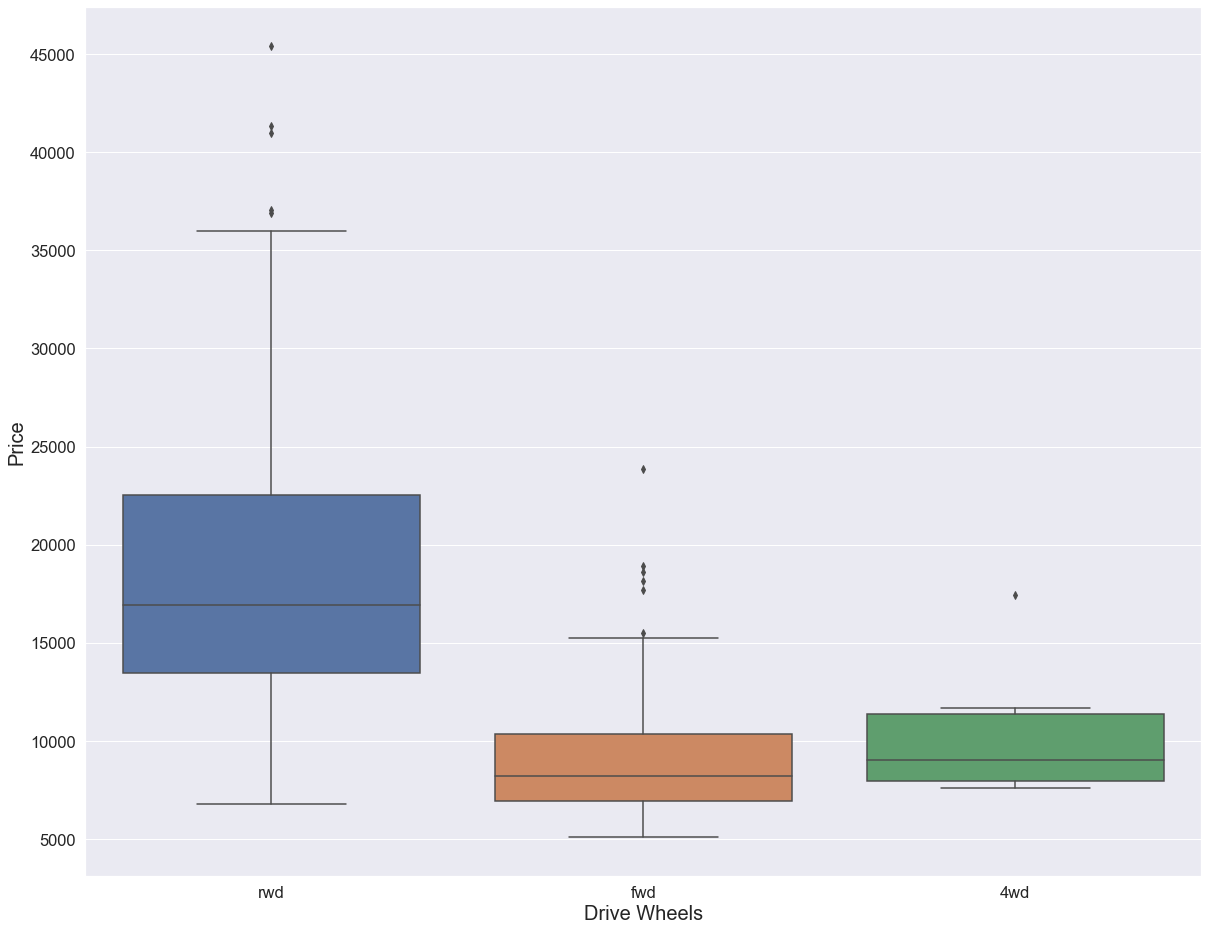

In [23]:
fig, ax = plt.subplots(figsize=(20, 16))
sns.set(font_scale=1.5) # Set font scale
sns.boxplot(x="drive-wheels", y="price", data=df, ax=ax)
plt.xlabel("Drive Wheels", fontsize=20) # Set x-label font size
plt.ylabel("Price", fontsize=20) # Set y-label font size
plt.show()


### Could engine size predict the price of the car? (both are continuos variables) target value is price and predictor value is engine-size

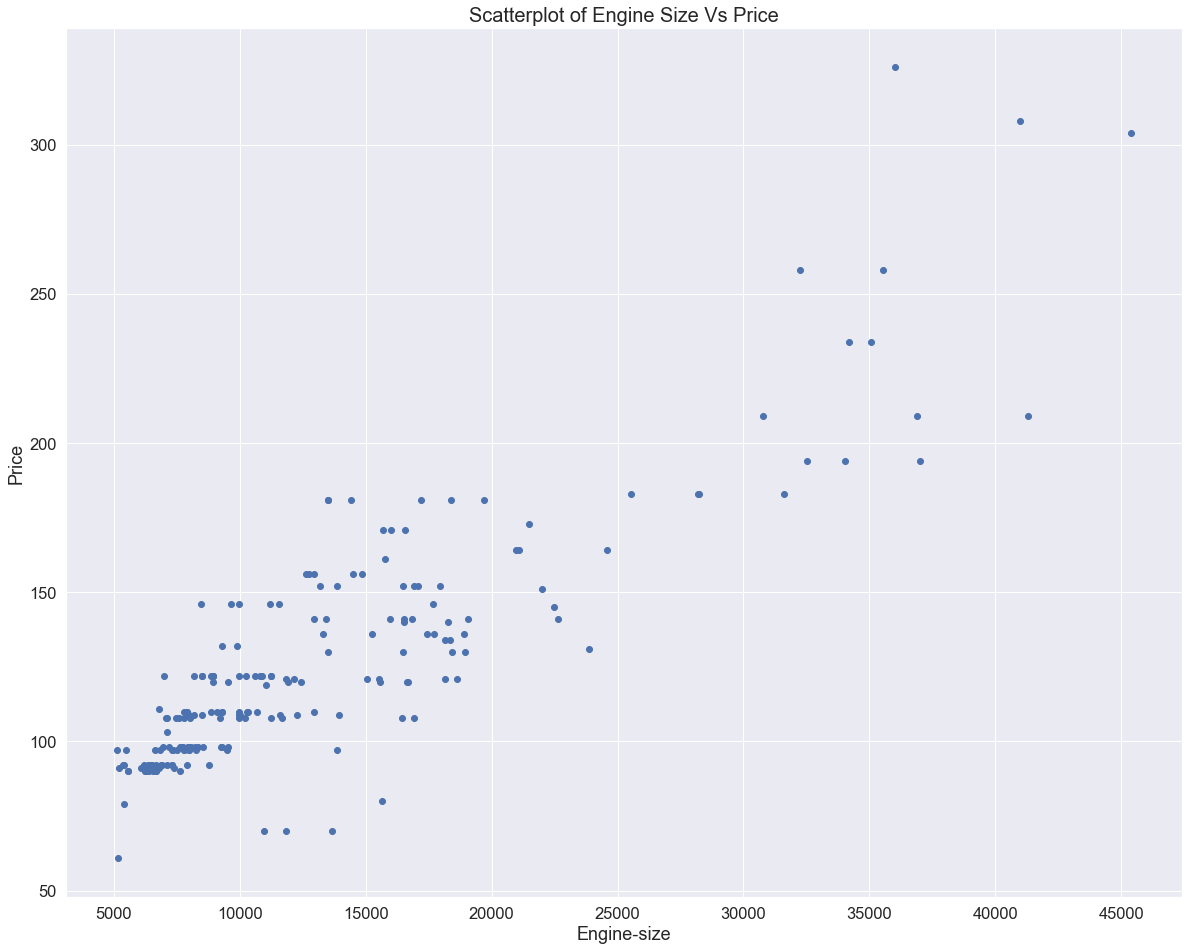

In [24]:
y=df["engine-size"]
x=df["price"]

plt.figure(figsize=(20, 16)) # Set figure size
plt.scatter(x,y)
plt.title("Scatterplot of Engine Size Vs Price", fontsize=20)
plt.xlabel("Engine-size", fontsize=18) # Set x-label font size
plt.ylabel("Price", fontsize=18) # Set y-label font size

plt.show()


#### Analysis: There is a positive linear relationship between the two variables.

### Is there any relationship between the different types of drive-system, forward, rear and four wheel drive and the price of the used cars? Which type of drive- system adds more value to a vehicle? group all the data with different types of drive wheels

In [28]:
df_test= df[["drive-wheels","body-style","price"]]
df_grp = df_test.groupby(["drive-wheels","body-style"], as_index=False).mean()
df_pivot=df_grp.pivot(index="drive-wheels",columns="body-style")
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [33]:
df_pivot.style.background_gradient(cmap='cool')
##heatmap todo

### Applying Anova

## Correlation

In [34]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel,gas,std,turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,...,0.279719,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,...,0.239544,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,...,-0.360233,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,...,-0.286035,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,...,-0.245852,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,...,-0.309913,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,...,-0.279350,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,...,-0.256753,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,...,-0.267338,-0.582121,-0.591390,0.543154,0.554726,0.559197,0.054435,-0.054435,-0.227782,0.227782
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,...,-0.063720,-0.034079,-0.034741,0.082267,0.036285,0.047199,0.241033,-0.241033,-0.218190,0.218190


In [35]:
df[['bore','stroke' ,'compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001250,0.566838
stroke,-0.055390,1.000000,0.187854,0.097815
compression-ratio,0.001250,0.187854,1.000000,-0.214431
horsepower,0.566838,0.097815,-0.214431,1.000000


(0.0, 53498.279178959085)

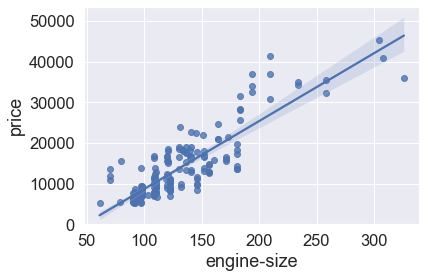

In [36]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

We can examine the correlation between 'engine-size' and 'price' and see it's approximately 0.87

In [37]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

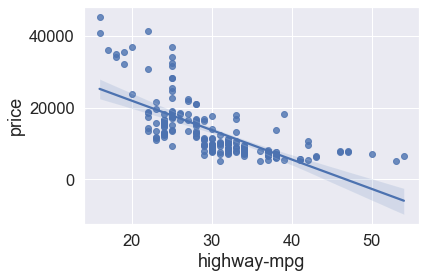

In [38]:
sns.regplot(x="highway-mpg", y="price", data=df)

In [39]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


As the highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.

We can examine the correlation between 'highway-mpg' and 'price' and see it's approximately -0.704

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

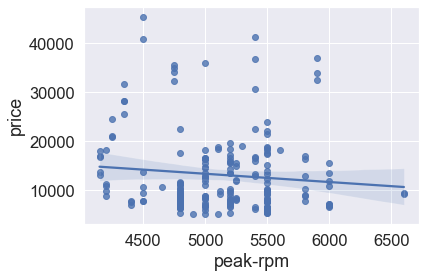

In [40]:
sns.regplot(x="peak-rpm", y="price", data=df)

Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.

We can examine the correlation between 'peak-rpm' and 'price' and see it's approximately -0.101616

In [41]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101542
price,-0.101542,1.000000


In [42]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.000000,0.082267
price,0.082267,1.000000


<AxesSubplot:xlabel='stroke', ylabel='price'>

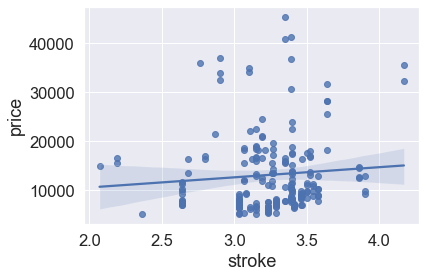

In [43]:
sns.regplot(x="stroke", y="price", data=df)

<AxesSubplot:xlabel='body-style', ylabel='price'>

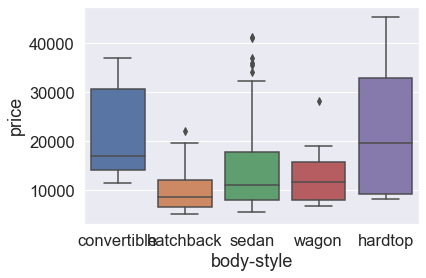

In [44]:
sns.boxplot(x="body-style", y="price", data=df)

<AxesSubplot:xlabel='engine-location', ylabel='price'>

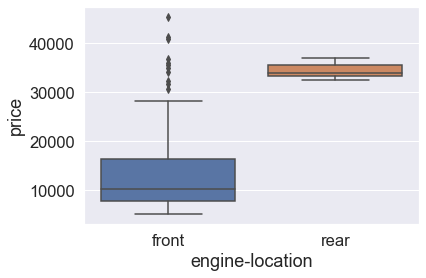

In [45]:
sns.boxplot(x="engine-location", y="price", data=df)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

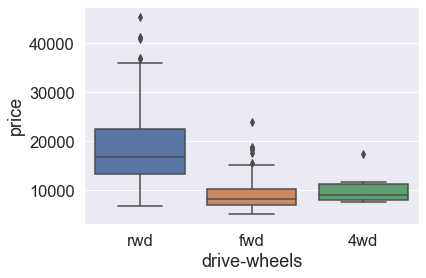

In [46]:
sns.boxplot(x="drive-wheels", y="price", data=df)

In [47]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned,price-binned
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low,Low
freq,32,115,94,118,198,145,157,92,153,171


In [48]:
df.describe(include=['int'])

,symboling,curb-weight,engine-size,city-mpg,highway-mpg,price,diesel,gas,std,turbo
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,2555.666667,126.875622,25.179104,30.686567,13207.129353,0.099502,0.900498,0.820896,0.179104
std,1.254802,517.296727,41.546834,6.423220,6.815150,7947.066342,0.300083,0.300083,0.384397,0.384397
min,-2.000000,1488.000000,61.000000,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2169.000000,98.000000,19.000000,25.000000,7775.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,2414.000000,120.000000,24.000000,30.000000,10295.000000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,2926.000000,141.000000,30.000000,34.000000,16500.000000,0.000000,1.000000,1.000000,0.000000
max,3.000000,4066.000000,326.000000,49.000000,54.000000,45400.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [50]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [51]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [52]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [53]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


In [54]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [55]:
df_group_one = df[['drive-wheels','body-style','price']]
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

You can also group with multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combinations 'drive-wheels' and 'body-style'. We can store the results in the variable 'grouped_test1'.

In [57]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [58]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222